# Assignment 2: Network Models – Project Management
Maddy Lok | MSDS 460 | 2 February 2025

### Part 1: Problem Setup

In [2]:
import pandas as pd

In [67]:
project_plan_path = "/Users/spud/Documents/MSDS 460/Lok-MSDS-460-Assignment-2/Lok-MSDS-460-Assignment-2/project-plan-v003.xlsx"
xls = pd.ExcelFile(project_plan_path)

xls.sheet_names


['Sheet1']

In [68]:
df_tasks = pd.read_excel(xls, sheet_name="Sheet1")

df_tasks.head(), df_tasks.columns


(  taskID                        task predecessorTaskIDs  bestCaseHours  \
 0      A            Describe product                NaN            NaN   
 1      B  Develop marketing strategy                NaN            NaN   
 2      C             Design brochure                  A            NaN   
 3      D  Develop product  prototype                NaN            NaN   
 4     D1       Requirements analysis                  A            NaN   
 
    expectedHours  worstCaseHours  projectManager  frontendDeveloper  \
 0            NaN             NaN             NaN                NaN   
 1            NaN             NaN             NaN                NaN   
 2            NaN             NaN             NaN                NaN   
 3            NaN             NaN             NaN                NaN   
 4            NaN             NaN             NaN                NaN   
 
    backendDeveloper  dataScientist  dataEngineer  
 0               NaN            NaN           NaN  
 1        

In [70]:
# replacing NaN values with 0
df_tasks[['bestCaseHours', 'expectedHours', 'worstCaseHours']] = df_tasks[['bestCaseHours', 'expectedHours', 'worstCaseHours']].fillna(0)
df_tasks[['bestCaseHours', 'expectedHours', 'worstCaseHours']].describe()


,bestCaseHours,expectedHours,worstCaseHours
count,16.0,16.0,16.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [71]:
# defining estimated industry standard hours for each task 
time_estimates = {
    "A": (8, 12, 16),    # Describe product
    "B": (12, 16, 24),   # Develop marketing strategy
    "C": (16, 24, 32),   # Design brochure
    "D": (160, 200, 240),# Develop product prototype
    "D1": (24, 32, 40),  # Requirements analysis
    "D2": (40, 50, 60),  # Software design
    "D3": (40, 50, 60),  # System design
    "D4": (40, 50, 60),  # Coding
    "D5": (40, 50, 60),  # Write documentation
    "D6": (24, 32, 40),  # Unit testing
    "D7": (24, 32, 40),  # System testing
    "D8": (16, 24, 32),  # Package deliverables
    "E": (16, 24, 32),   # Survey potential market
    "F": (24, 32, 40),   # Develop pricing plan
    "G": (8, 12, 16),    # Develop implementation plan 
    "H": (16, 24, 32)    # Wrtie client proposal
}

for task_id, (best, expected, worst) in time_estimates.items():
    df_tasks.loc[df_tasks["taskID"] == task_id, ["bestCaseHours", "expectedHours", "worstCaseHours"]] = best, expected, worst

df_tasks.head()

,taskID,task,predecessorTaskIDs,bestCaseHours,expectedHours,worstCaseHours,projectManager,frontendDeveloper,backendDeveloper,dataScientist,dataEngineer
0,A,Describe product,NaN,8.0,12.0,16.0,NaN,NaN,NaN,NaN,NaN
1,B,Develop marketing strategy,NaN,12.0,16.0,24.0,NaN,NaN,NaN,NaN,NaN
2,C,Design brochure,A,16.0,24.0,32.0,NaN,NaN,NaN,NaN,NaN
3,D,Develop product prototype,NaN,160.0,200.0,240.0,NaN,NaN,NaN,NaN,NaN
4,D1,Requirements analysis,A,24.0,32.0,40.0,NaN,NaN,NaN,NaN,NaN


In [72]:
# was having issues finding critical path so this is a debugging code i got from chatGPT
print("\nDEBUG: Industry-Standard Estimated Hours for Each Task")
for task, (best, expected, worst) in time_estimates.items():
    print(f"{task}: Best={best}, Expected={expected}, Worst={worst}")




DEBUG: Industry-Standard Estimated Hours for Each Task
A: Best=8, Expected=12, Worst=16
B: Best=12, Expected=16, Worst=24
C: Best=16, Expected=24, Worst=32
D: Best=160, Expected=200, Worst=240
D1: Best=24, Expected=32, Worst=40
D2: Best=40, Expected=50, Worst=60
D3: Best=40, Expected=50, Worst=60
D4: Best=40, Expected=50, Worst=60
D5: Best=40, Expected=50, Worst=60
D6: Best=24, Expected=32, Worst=40
D7: Best=24, Expected=32, Worst=40
D8: Best=16, Expected=24, Worst=32
E: Best=16, Expected=24, Worst=32
F: Best=24, Expected=32, Worst=40
G: Best=8, Expected=12, Worst=16
H: Best=16, Expected=24, Worst=32


Task Dependency Graph

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

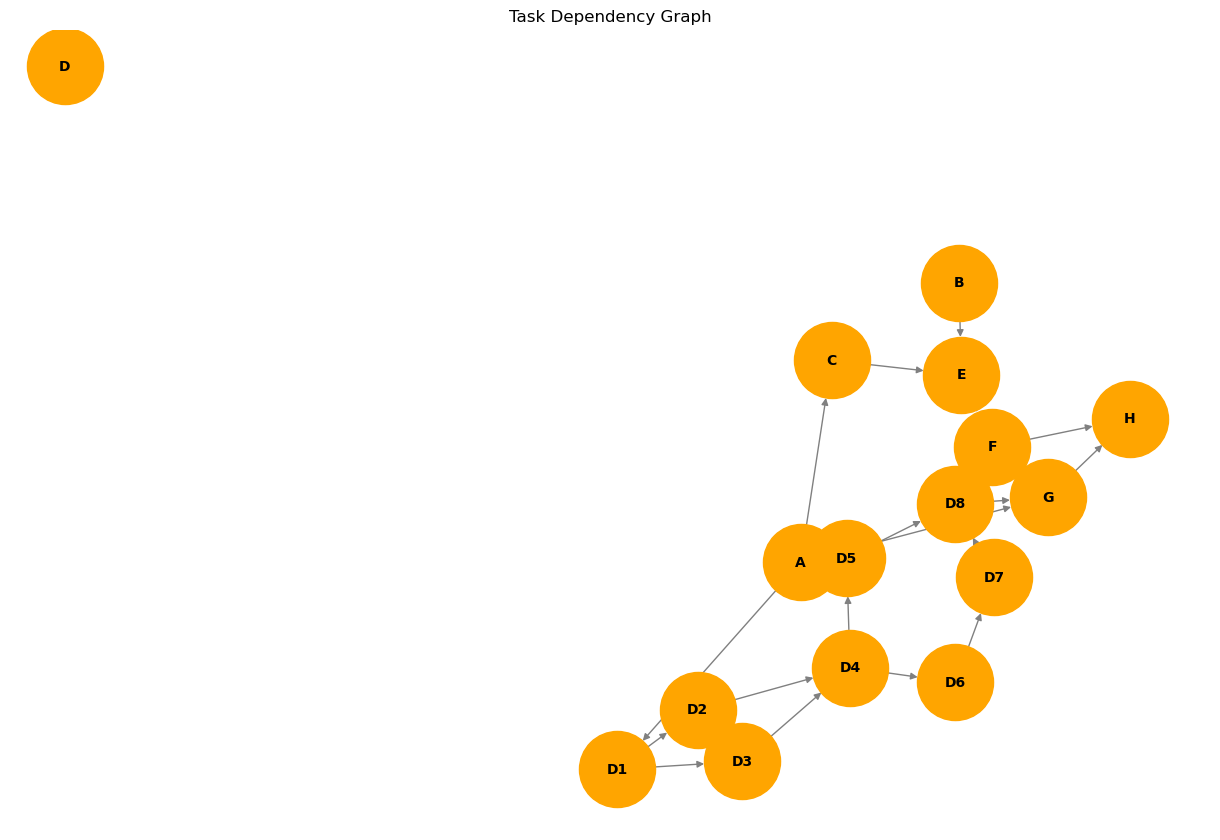

In [75]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (tasks)
for _, row in df_tasks.iterrows():
    G.add_node(row['taskID'], label=row['task'])

# Add edges (dependencies)
for _, row in df_tasks.iterrows():
    if pd.notna(row['predecessorTaskIDs']):  # If there are dependencies
        predecessors = str(row['predecessorTaskIDs']).split(',')
        for pred in predecessors:
            pred = pred.strip()
            if pred in G.nodes:
                G.add_edge(pred, row['taskID'])
# Plot the dependency graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes for visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="orange", edge_color="gray", font_size=10, font_weight="bold", arrows=True)
plt.title("Task Dependency Graph")
plt.show()

In [76]:
independent_tasks = df_tasks[df_tasks["predecessorTaskIDs"].isna()]["taskID"].tolist()

single_dependency_tasks = df_tasks[df_tasks["predecessorTaskIDs"].str.count(",").fillna(0) == 0]["taskID"].tolist()
parallel_tasks = {
    "Independent Tasks (Start Immediately)": independent_tasks,
    "Single Dependency Tasks (Can Start Soon)": single_dependency_tasks,
}

parallel_tasks

{'Independent Tasks (Start Immediately)': ['A', 'B', 'D'],
 'Single Dependency Tasks (Can Start Soon)': ['A',
  'B',
  'C',
  'D',
  'D1',
  'D2',
  'D3',
  'D5',
  'D6',
  'D7']}

# Part 2: Model Specification & Part 3: Programming

In [77]:
from pulp import LpMinimize, LpProblem, LpVariable

# LP Problem
lp_model = LpProblem("Project_Scheduling_Optimization", LpMinimize)

# decision variables
task_vars = {task: LpVariable(f"T_{task}", lowBound=0) for task in df_tasks["taskID"]}

# constraint: total project time
T_end = LpVariable("T_end", lowBound=0)

# objective function: minimize total duration of development time
lp_model += T_end

# constraint: dependency constraint
for _, row in df_tasks.iterrows():
    task = row["taskID"]
    duration = row["expectedHours"]

    if pd.notna(row["predecessorTaskIDs"]): 
        predecessors = str(row["predecessorTaskIDs"]).split(",")
        for pred in predecessors:
            pred = pred.strip()
            if pred in task_vars: 
                lp_model += task_vars[pred] + duration <= task_vars[task]

for task, var in task_vars.items():
    duration = df_tasks.loc[df_tasks["taskID"] == task, "expectedHours"].values[0]
    lp_model += var + duration <= T_end

# solving problem
from pulp import PULP_CBC_CMD
lp_model.solve(PULP_CBC_CMD(msg=False))

print("Project Scheduling Optimization Results:")
print(f"Minimum Project Completion Time: {T_end.varValue} hours\n")

print("Task Start Times:")
for task, var in task_vars.items():
    print(f"{task}: Start at {var.varValue} hours")


Project Scheduling Optimization Results:
Minimum Project Completion Time: 300.0 hours

Task Start Times:
A: Start at 0.0 hours
B: Start at 0.0 hours
C: Start at 24.0 hours
D: Start at 0.0 hours
D1: Start at 32.0 hours
D2: Start at 82.0 hours
D3: Start at 82.0 hours
D4: Start at 132.0 hours
D5: Start at 182.0 hours
D6: Start at 164.0 hours
D7: Start at 196.0 hours
D8: Start at 220.0 hours
E: Start at 48.0 hours
F: Start at 252.0 hours
G: Start at 232.0 hours
H: Start at 276.0 hours


In [20]:
# task start and end times
task_end_times = {task: var.varValue + df_tasks.loc[df_tasks["taskID"] == task, "expectedHours"].values[0] for task, var in task_vars.items()}
task_start_times = {task: task_vars[task].varValue for task in task_vars}


In [78]:
# another debugging code i got from chatgpt to try to fix my critical path code
h_slack = task_vars["H"].varValue - max(task_end_times["F"], task_end_times["G"])
print(f"\nDEBUG: Task H Slack = {h_slack} hours")




DEBUG: Task H Slack = -8.0 hours


In [79]:
lp_model += task_vars["H"] == task_end_times["F"]


In [80]:
critical_path = set()

def trace_full_critical_path(task):
    """Recursively add tasks to the critical path by following dependencies back to the beginning."""
    if task in critical_path:
        return 

    critical_path.add(task)

    predecessors = df_tasks.loc[df_tasks["taskID"] == task, "predecessorTaskIDs"].values[0]
    if pd.notna(predecessors):
        for pred in str(predecessors).split(","):
            pred = pred.strip()
            if pred in task_end_times:
                trace_full_critical_path(pred)  

for task, end_time in task_end_times.items():
    if abs(end_time - T_end.varValue) <= 2:
        trace_full_critical_path(task)

critical_path = sorted(set(critical_path), key=lambda x: task_vars[x].varValue)

print("\nCritical Path Tasks:")
print(" → ".join(critical_path))



Critical Path Tasks:
B → A → C → D1 → E → D2 → D3 → D4 → D6 → D5 → D7 → D8 → G → F → H


In [81]:
lp_model

Project_Scheduling_Optimization:
MINIMIZE
1*T_end + 0
SUBJECT TO
_C1: T_A - T_C <= -24

_C2: T_A - T_D1 <= -32

_C3: T_D1 - T_D2 <= -50

_C4: T_D1 - T_D3 <= -50

_C5: T_D2 - T_D4 <= -50

_C6: T_D3 - T_D4 <= -50

_C7: T_D4 - T_D5 <= -50

_C8: T_D4 - T_D6 <= -32

_C9: T_D6 - T_D7 <= -32

_C10: T_D5 - T_D8 <= -24

_C11: T_D7 - T_D8 <= -24

_C12: T_B - T_E <= -24

_C13: T_C - T_E <= -24

_C14: T_D8 - T_F <= -32

_C15: T_E - T_F <= -32

_C16: T_A - T_G <= -12

_C17: T_D8 - T_G <= -12

_C18: T_F - T_H <= -24

_C19: T_G - T_H <= -24

_C20: T_A - T_end <= -12

_C21: T_B - T_end <= -16

_C22: T_C - T_end <= -24

_C23: T_D - T_end <= -200

_C24: T_D1 - T_end <= -32

_C25: T_D2 - T_end <= -50

_C26: T_D3 - T_end <= -50

_C27: T_D4 - T_end <= -50

_C28: T_D5 - T_end <= -50

_C29: T_D6 - T_end <= -32

_C30: T_D7 - T_end <= -32

_C31: T_D8 - T_end <= -24

_C32: T_E - T_end <= -24

_C33: T_F - T_end <= -32

_C34: T_G - T_end <= -12

_C35: T_H - T_end <= -24

_C36: T_H = 284

VARIABLES
T_A Continuous


# Part 4: Solution

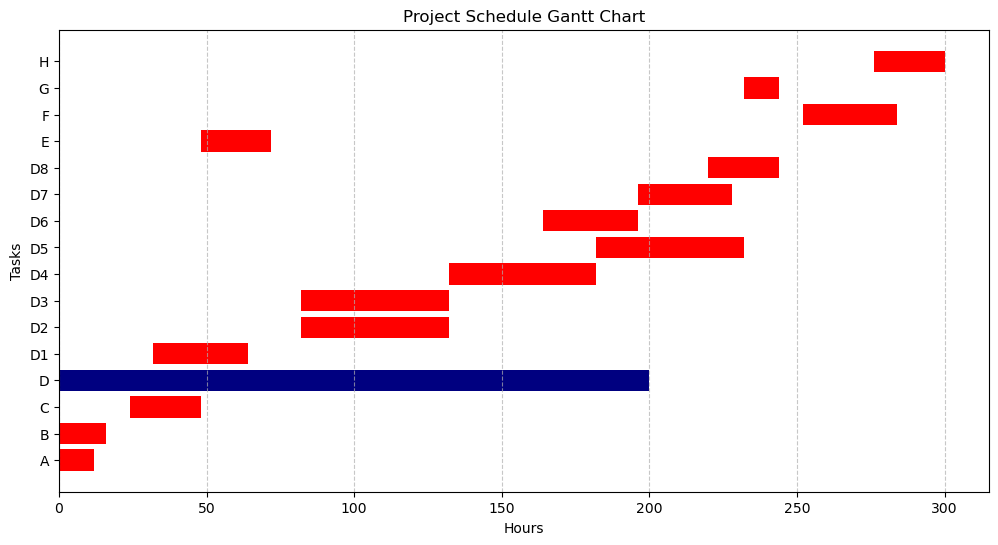

In [83]:
# Gantt chart overall
plt.figure(figsize=(12, 6))

for i, task in enumerate(task_vars.keys()):
    start = task_start_times[task]
    duration = df_tasks.loc[df_tasks["taskID"] == task, "expectedHours"].values[0]

    color = "red" if task in critical_path else "navy"
    
    plt.barh(i, duration, left=start, color=color)

plt.xlabel("Hours")
plt.ylabel("Tasks")
plt.title("Project Schedule Gantt Chart")
plt.yticks(range(len(task_vars)), list(task_vars.keys()))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



Best-Case Scenario
Project Completion Time: 224.0 hours
Critical Path: B → A → C → D1 → E → D2 → D3 → D4 → D6 → D5 → D7 → D8 → G → F → H


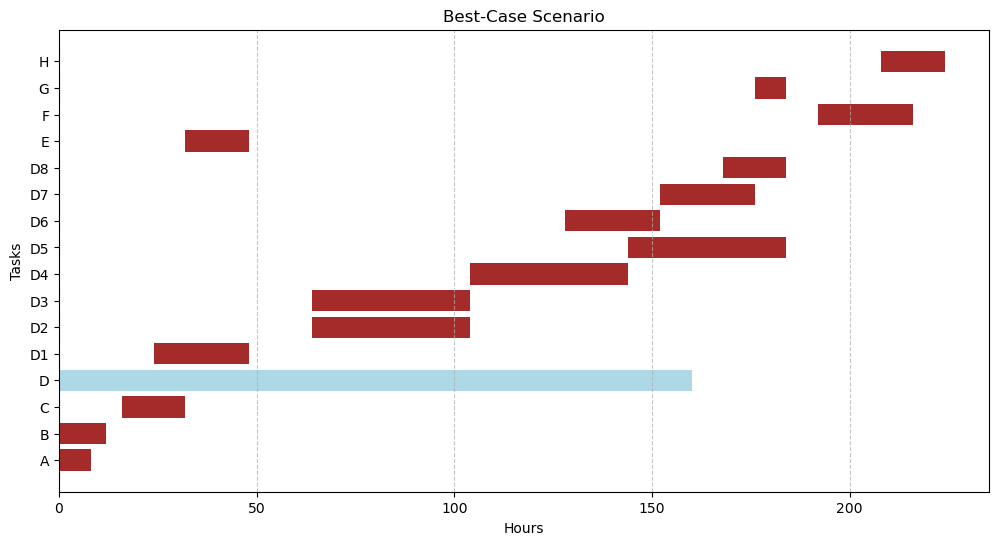


Expected-Case Scenario
Project Completion Time: 300.0 hours
Critical Path: B → A → C → D1 → E → D2 → D3 → D4 → D6 → D5 → D7 → D8 → G → F → H


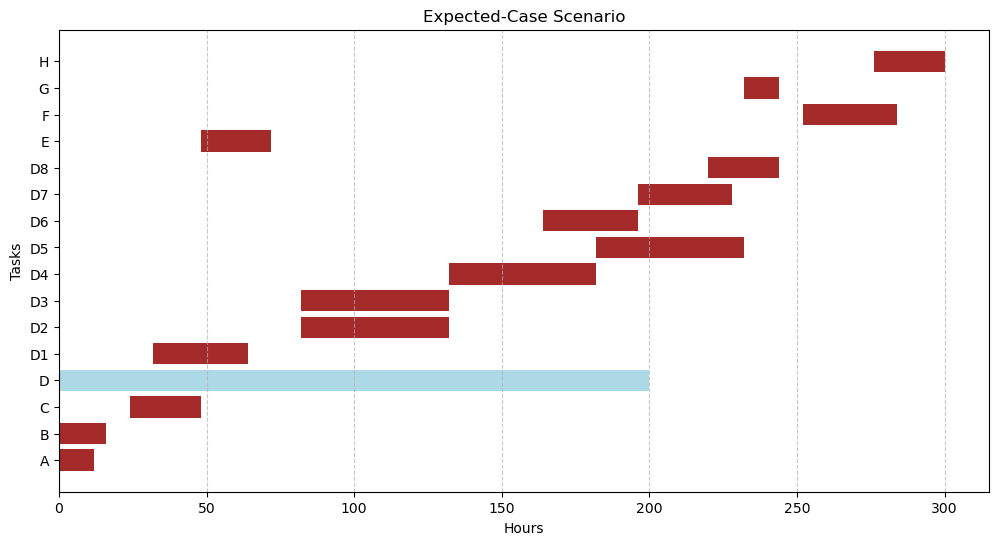


Worst-Case Scenario
Project Completion Time: 376.0 hours
Critical Path: B → A → C → D1 → E → D2 → D3 → D4 → D6 → D5 → D7 → D8 → G → F → H


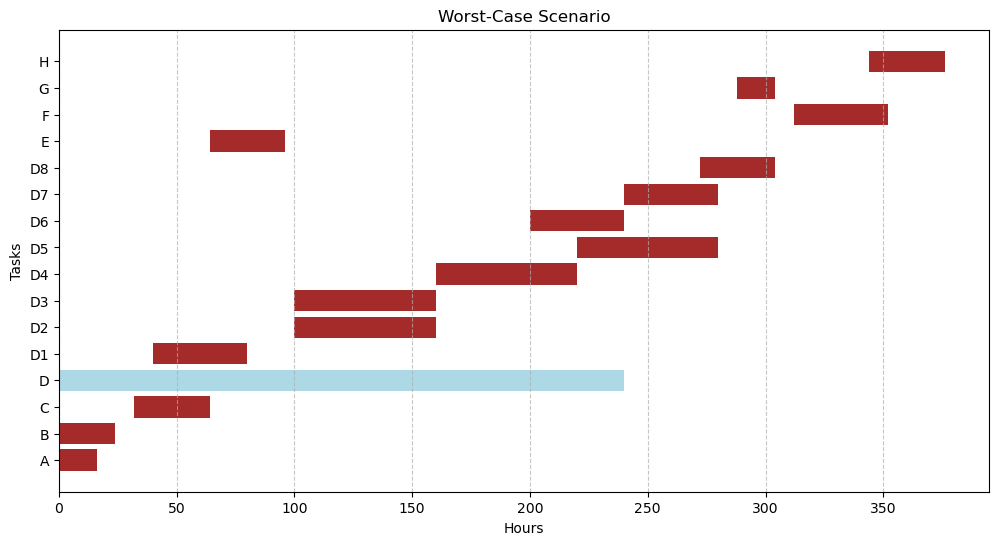

In [87]:
# solving lp problem for all three scenarios
def solve_and_visualize_scenario(scenario_name, time_column):
    """Solves the LP model for the given scenario (best-case, expected-case, worst-case) and generates a Gantt chart."""
    
    lp_model = LpProblem(f"Project_Scheduling_{scenario_name}", LpMinimize)
    task_vars = {task: LpVariable(f"T_{task}", lowBound=0) for task in df_tasks["taskID"]}

    T_end = LpVariable("T_end", lowBound=0)

    lp_model += T_end

    for _, row in df_tasks.iterrows():
        task = row["taskID"]
        duration = row[time_column] 

        if pd.notna(row["predecessorTaskIDs"]): 
            predecessors = str(row["predecessorTaskIDs"]).split(",")
            for pred in predecessors:
                pred = pred.strip()
                if pred in task_vars:
                    lp_model += task_vars[pred] + duration <= task_vars[task]

    for task, var in task_vars.items():
        duration = df_tasks.loc[df_tasks["taskID"] == task, time_column].values[0]
        lp_model += var + duration <= T_end

    lp_model.solve(PULP_CBC_CMD(msg=False))

    task_start_times = {task: task_vars[task].varValue for task in task_vars}
    task_end_times = {task: task_start_times[task] + df_tasks.loc[df_tasks["taskID"] == task, time_column].values[0] for task in task_vars}

    critical_path = set()

    def trace_critical_path(task):
        """Recursively add tasks to the critical path by following dependencies."""
        if task in critical_path:
            return
        critical_path.add(task)

        predecessors = df_tasks.loc[df_tasks["taskID"] == task, "predecessorTaskIDs"].values[0]
        if pd.notna(predecessors):
            for pred in str(predecessors).split(","):
                pred = pred.strip()
                if pred in task_end_times:
                    trace_critical_path(pred)

    for task, end_time in task_end_times.items():
        if abs(end_time - T_end.varValue) <= 2:
            trace_critical_path(task)

    critical_path = sorted(set(critical_path), key=lambda x: task_vars[x].varValue)

    print(f"\n{scenario_name} Scenario")
    print(f"Project Completion Time: {T_end.varValue} hours")
    print("Critical Path:", " → ".join(critical_path))

    plt.figure(figsize=(12, 6))
    for i, task in enumerate(task_vars.keys()):
        start = task_start_times[task]
        duration = df_tasks.loc[df_tasks["taskID"] == task, time_column].values[0]
        color = "brown" if task in critical_path else "lightblue"
        plt.barh(i, duration, left=start, color=color)

    plt.xlabel("Hours")
    plt.ylabel("Tasks")
    plt.title(f"{scenario_name} Scenario")
    plt.yticks(range(len(task_vars)), list(task_vars.keys()))
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

solve_and_visualize_scenario("Best-Case", "bestCaseHours")
solve_and_visualize_scenario("Expected-Case", "expectedHours")
solve_and_visualize_scenario("Worst-Case", "worstCaseHours")


Defining Hourly Rates

In [88]:
# estimated hourly rates for contractors in each role per the averages of the state of massachusetts
hourly_rates = {
    "Project Manager": 60, 
    "Frontend Dev": 55, 
    "Backend Dev": 65, 
    "Data Scientist": 70, 
    "Data Engineer": 50
}


In [90]:
# estimated number of workers in each role for each task
worker_requirements = {
    "A": {"Project Manager": 1}, 
    "B": {"Project Manager": 1}, 
    "C": {"Frontend Dev": 1}, 
    "D1": {"Project Manager": 1, "Backend Dev": 2, "Data Scientist": 2, "Data Engineer": 2}, 
    "D2": {"Data Engineer": 1, "Backend Dev": 2}, 
    "D3": {"Backend Dev": 3, "Data Scientist": 2, "Data Engineer": 1}, 
    "D4": {"Backend Dev": 3, "Frontend Dev": 2, "Data Scientist": 2, "Data Engineer": 2}, 
    "D5": {"Frontend Dev": 3}, 
    "D6": {"Backend Dev": 1, "Data Scientist": 1, "Data Engineer": 2}, 
    "D7": {"Backend Dev": 3, "Frontend Dev": 2, "Data Scientist": 1, "Data Engineer": 1}, 
    "D8": {"Backend Dev": 2, "Frontend Dev": 1},  
    "E": {"Project Manager": 2, "Data Scientist": 2}, 
    "F": {"Project Manager": 3, "Data Scientist": 2}, 
    "G": {"Project Manager": 2, "Data Scientist": 1, "Data Engineer": 1}, 
    "H": {"Project Manager": 2, "Data Scientist": 1}
}

In [94]:
lp_model.solve(PULP_CBC_CMD(msg=False))


1

In [96]:
def calculate_project_cost(time_column, scenario_name):
    """Calculate total project cost based on best, expected, or worst-case task durations."""
    total_cost = 0
    task_costs = {}

    for task, workers in worker_requirements.items():
        duration = df_tasks.loc[df_tasks["taskID"] == task, time_column].values[0]
        task_cost = 0
        
        for role, count in workers.items():
            task_cost += count * hourly_rates[role] * duration

        task_costs[task] = task_cost
        total_cost += task_cost

    print(f"\n{scenario_name} Scenario - Total Estimated Project Cost: ${total_cost:,.2f}")
    
    return task_costs

best_case_costs = calculate_project_cost("bestCaseHours", "Best-Case")
expected_case_costs = calculate_project_cost("expectedHours", "Expected-Case")
worst_case_costs = calculate_project_cost("worstCaseHours", "Worst-Case")



Best-Case Scenario - Total Estimated Project Cost: $99,000.00

Expected-Case Scenario - Total Estimated Project Cost: $129,990.00

Worst-Case Scenario - Total Estimated Project Cost: $161,220.00


In [95]:
def print_task_cost_breakdown(task_costs, scenario_name):
    """Prints the cost breakdown per task for a given scenario."""
    print(f"\n{scenario_name} Scenario - Cost Breakdown Per Task:")
    for task, cost in task_costs.items():
        print(f"{task}: ${cost:,.2f}")

print_task_cost_breakdown(best_case_costs, "Best-Case")
print_task_cost_breakdown(expected_case_costs, "Expected-Case")
print_task_cost_breakdown(worst_case_costs, "Worst-Case")



Best-Case Scenario - Cost Breakdown Per Task:
A: $480.00
B: $720.00
C: $880.00
D1: $10,320.00
D2: $7,200.00
D3: $15,400.00
D4: $21,800.00
D5: $6,600.00
D6: $5,640.00
D7: $10,200.00
D8: $2,960.00
E: $4,160.00
F: $7,680.00
G: $1,920.00
H: $3,040.00

Expected-Case Scenario - Cost Breakdown Per Task:
A: $720.00
B: $960.00
C: $1,320.00
D1: $13,760.00
D2: $9,000.00
D3: $19,250.00
D4: $27,250.00
D5: $8,250.00
D6: $7,520.00
D7: $13,600.00
D8: $4,440.00
E: $6,240.00
F: $10,240.00
G: $2,880.00
H: $4,560.00

Worst-Case Scenario - Cost Breakdown Per Task:
A: $960.00
B: $1,440.00
C: $1,760.00
D1: $17,200.00
D2: $10,800.00
D3: $23,100.00
D4: $32,700.00
D5: $9,900.00
D6: $9,400.00
D7: $17,000.00
D8: $5,920.00
E: $8,320.00
F: $12,800.00
G: $3,840.00
H: $6,080.00
